In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

In [3]:
file = "output.csv"

In [4]:
columns = ["Time", "X", "U", "V"]
df = pd.read_csv(file, names=columns)
df

,Time,X,U,V
0,0.0,0.000000,1.000000,0.000000
1,0.0,0.170434,1.063420,0.000000
2,0.0,0.340869,1.126590,0.000000
3,0.0,0.511303,1.189250,0.000000
4,0.0,0.681737,1.251150,0.000000
...,...,...,...,...
50095,1.0,16.191300,0.369848,-0.459616
50096,1.0,16.361700,0.383968,-0.473852
50097,1.0,16.532100,0.398152,-0.487967
50098,1.0,16.702600,0.412343,-0.501899


In [5]:
t, x, u, v = df.Time.values, df.X.values, df.U.values, df.V.values

In [6]:
max(u)

1.99987

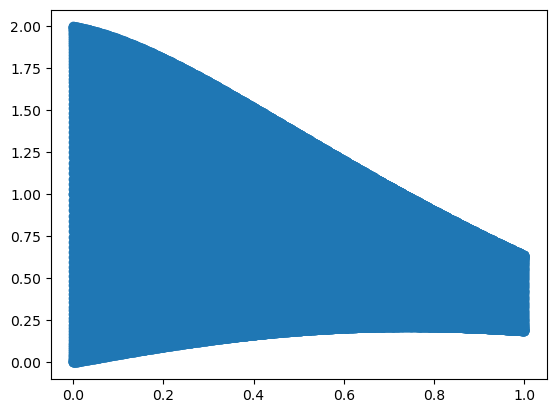

In [7]:
%matplotlib inline
plt.scatter(t, u)

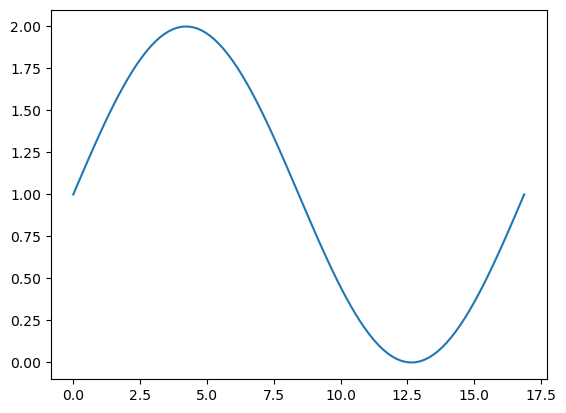

In [8]:
fig, ax = plt.subplots()
line, = ax.plot(x[:100], u[:100])

In [9]:
count = (df["Time"] == 1).sum()
count

100

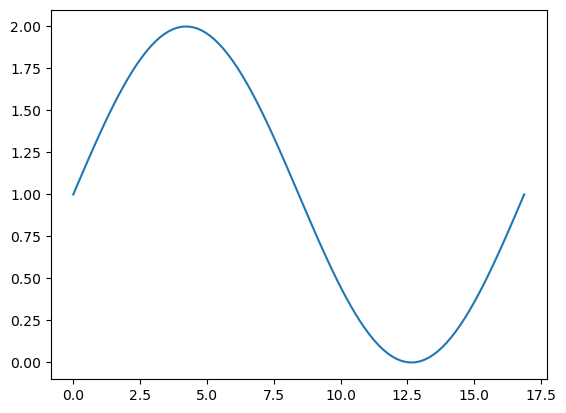

In [10]:
%matplotlib inline
fig, ax = plt.subplots()
line, = ax.plot(x[:100], u[:100])

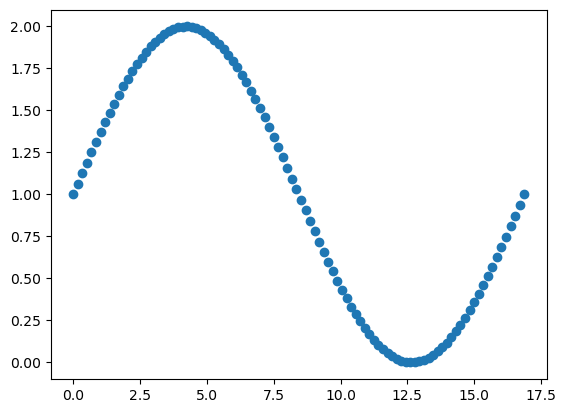

In [11]:
plt.scatter(x[:100], u[:100])

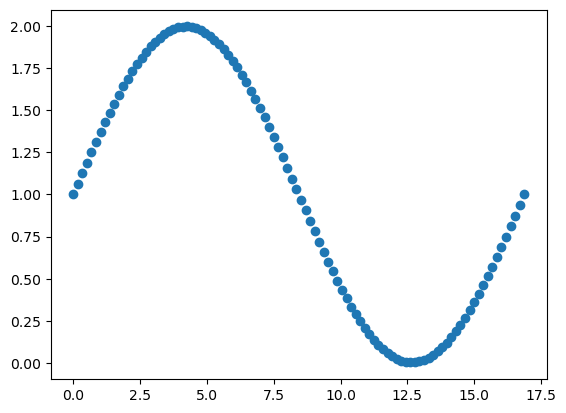

In [12]:
plt.scatter(x[400:500], u[400:500])

<IPython.core.display.Javascript object>


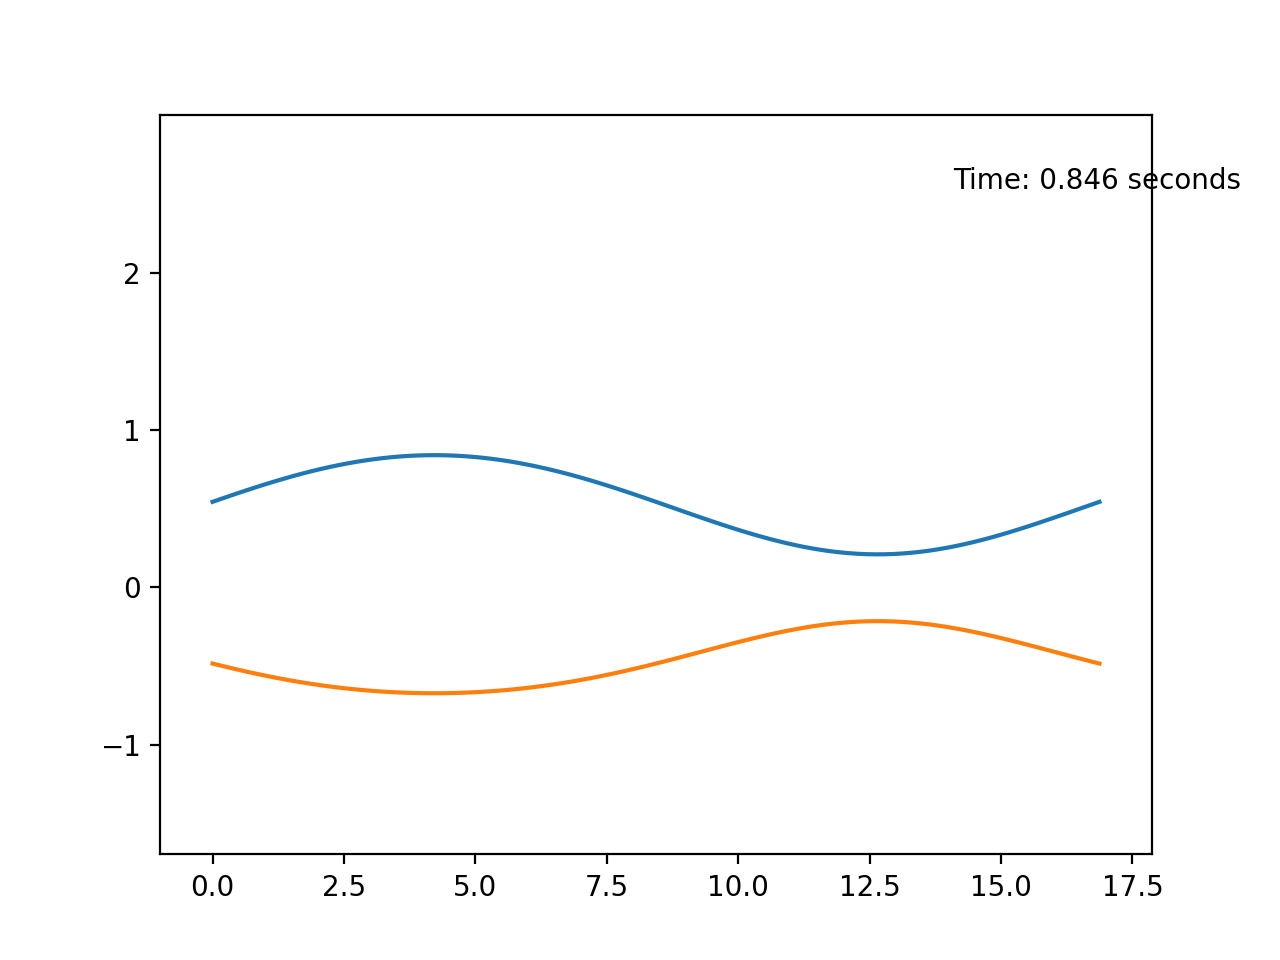

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_6877/1647086487.py:21: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [14]:
fig, ax = plt.subplots()
line1, = ax.plot(x[:100], u[:100])
line2, = ax.plot(x[:100], v[:100])
text = ax.text(0.8, 0.9, '', transform=ax.transAxes)

ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(min(v) - 1, max(u) + 1)

def update(frame):
    line1.set_ydata(u[frame*100 : (frame + 1)*100])
    line2.set_ydata(v[frame*100 : (frame + 1)*100])
    text.set_text(f'Time: {t[frame*100]} seconds')
    return line1, line2, text

%matplotlib notebook
ani = FuncAnimation(fig, update, frames=len(x), interval=50)

animation_file = 'wave_animation.mp4'
# ani.save(animation_file, writer='ffmpeg', fps=30)

plt.show()